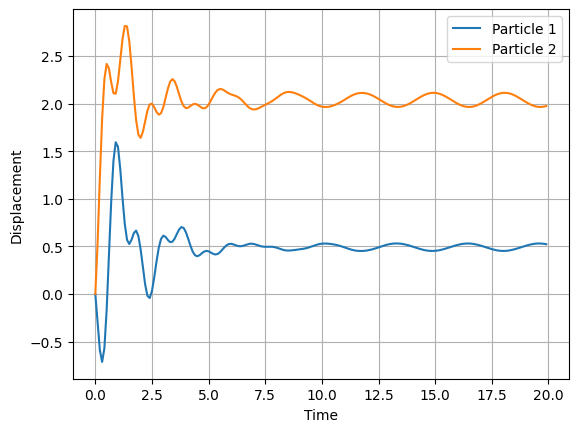

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
m1 = 1.0                # 1st particle's mass
m2 = 1.0                # 2nd particle's mass
k1 = 2.0                # Elasticity coefficient 1
k2 = 4.0                # Elasticity coefficient 2
k3 = 1.5                # Elasticity coefficient 3
b1 = 0.5                # Damping coefficient 1
b2 = 0.3                # Damping coefficient 2
L1 = 2.0                # Equilibrium length 1
L2 = 1.2                # Equilibrium length 2
L3 = 1.4                # Equilibrium length 3
dt = 0.1               # Time step
A = 1                   # Force amplitude
w = 2                   # Angular frequency
num_steps = 200        # Number of simulation steps

def forest_ruth_integration(x1, x2, v1, v2, dt):
    # Forest-Ruth coefficients
    a = 0.6756035959798289
    b = -0.1756035959798288
    c = 1.3512071919596578
    d = 1.3512071919596578
    e = -0.6756035959798288
    f = 0.6756035959798289
    
    # Velocity Verlet integration
    x1 += v1 * dt * a
    x2 += v2 * dt * a
    
    x1, x2, v1, v2 = verlet_integration(x1, x2, v1, v2, dt * b)
    x1, x2, v1, v2 = verlet_integration(x1, x2, v1, v2, dt * c)
    x1, x2, v1, v2 = verlet_integration(x1, x2, v1, v2, dt * d)
    x1, x2, v1, v2 = verlet_integration(x1, x2, v1, v2, dt * e)
    
    x1 += v1 * dt * f
    x2 += v2 * dt * f
    
    return x1, x2, v1, v2

def verlet_integration(x1, x2, v1, v2, dt):
    x1 += v1 * dt / 2
    x2 += v2 * dt / 2
    
    a1 = (-1)*(k1 * (x1 - L1) - k2*(x2 - x1 - L2) + b1*v1 ) / m1
    a2 = (-1)*(k2 * (x2 - x1 - L2) + k3 * (x2 - L3) + b2*v2) / m2
    
    v1 += a1 * dt
    v2 += a2 * dt
    
    x1 += v1 * dt / 2
    x2 += v2 * dt / 2
    
    return x1, x2, v1, v2

# Initialize arrays
t_values = np.zeros(num_steps)
x1_values = np.zeros(num_steps)
x2_values = np.zeros(num_steps)

# Initial conditions
x1 = 1.0
x2 = 0.0
v1 = 0.0
v2 = 0.0

# Perform simulation
for i in range(num_steps):
    t = i * dt
    
    # Apply external force
    F = A * np.sin(w * t)
    x1, x2, v1, v2 = verlet_integration(x1, x2, v1, v2, dt / 2)
    v1 += (F / m1 - b1 * v1) * dt / 2
    v2 += (-F / m2 - b2 * v2) * dt / 2
    x1, x2, v1, v2 = verlet_integration(x1, x2, v1, v2, dt)
    v1 += (F / m1 - b1 * v1) * dt / 2
    v2 += (-F / m2 - b2 * v2) * dt / 2
    x1, x2, v1, v2 = verlet_integration(x1, x2, v1, v2, dt / 2)
    
    # Store values
    t_values[i] = t
    x1_values[i] = x1
    x2_values[i] = x2

# Plot results
plt.plot(t_values, x1_values-x1_values[0], label='Particle 1')
plt.plot(t_values, x2_values-x2_values[0], label='Particle 2')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.grid(True)
plt.legend()
plt.show()

